In [0]:
import numpy as np
import pandas as pd
import random

In [0]:
data = pd.read_excel('Dataset_Question2.xlsx')    #importing data

In [41]:
#Group the feature columns as X
features_col = ['Temperature', 'Pressure', 'Feed Flow rate',	'Coolant Flow rate',	'Inlet reactant concentration']
X = data[features_col]
X[:5]

,Temperature,Pressure,Feed Flow rate,Coolant Flow rate,Inlet reactant concentration
0,406.86,17.66,121.83,2109.20,0.1033
1,693.39,24.66,133.18,3138.96,0.3785
2,523.10,23.23,146.55,1058.24,0.4799
3,612.86,40.97,94.44,1325.12,0.3147
4,500.28,37.44,185.48,2474.51,0.2284


In [0]:
#Define output column
Y = data['Test']

In [0]:
#Converting the categorical output to quantitative
Y = [1 if i == "Pass" else 0 for i in Y]

In [44]:
#Standardizing the features
import sklearn
from sklearn import preprocessing
X = preprocessing.scale(X)
X

array([[-1.61154042, -0.54988532, -0.07356461, -0.24446232, -1.71883457],
       [ 1.68891315, -0.05849447,  0.18743653,  1.10462947,  0.65349368],
       [-0.27260655, -0.1588786 ,  0.49488898, -1.6213283 ,  1.52760009],
       ...,
       [ 1.5776425 ,  1.02396939, -0.64454773, -0.19729861, -0.59559921],
       [ 0.7640766 ,  0.60628716,  0.87845718,  1.14796769,  0.49487871],
       [-0.77747124, -0.56532903, -0.82414411, -1.22024023,  1.04572091]])

In [0]:
#Test-train split
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.3,random_state=0)

# New Section

In [0]:
#Setting learning rate and iterations
lr = 0.1
iterations = 1000
initializations = 50

In [0]:
#Defining no. of samples and features
nsamples, nfeatures = X.shape

In [0]:
#Defining the sigmoid funtion
def sigmoid(x):
        return 1 / (1 + np.exp(-x))

In [0]:
#Defining Cost, Coefficients and self bias matrix

J = np.zeros(initializations*7).reshape(initializations, 7)
cost = np.zeros(initializations*iterations).reshape(iterations, initializations)

In [97]:
#Gradient Descent


for i in range(initializations):
  beta = random.sample(range(-10, 10), 5)
  bias = random.sample(range(-10, 10), 1)


  for j in range(iterations):
            
      lin_comb_train = np.dot(X_train, beta) + bias
            
      model_train = sigmoid(lin_comb_train)

      dbeta = (1 / len(Y_train)) * np.dot(X_train.T, (model_train - Y_train))
      dbias = (1 / len(Y_train)) * np.sum(model_train - Y_train)
           
      beta = beta - lr * dbeta
      bias = bias - lr * dbias

      cost[j][i] = -(1 / len(Y_train)) * ( np.dot(Y_train, np.log(model_train)) + np.dot((np.ones(len(Y_train))-Y_train), (np.log(np.ones(len(Y_train))-model_train))))

  J[i][0] = cost[iterations-1][i]
  J[i][1:6] = beta.T
  J[i][6] = bias 

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:20: RuntimeWarning: divide by zero encountered in log


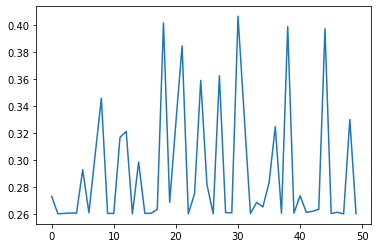

In [125]:
#Plot the cost function values for all initializations

import matplotlib.pyplot as plt
plt.plot(J[:,0])

In [107]:
print (min(J[:,0]), "is the minimum value of cost funtion")

0.2603452749568896 is the minimum value of cost funtion


(array([47]),)

0.2603452749568896

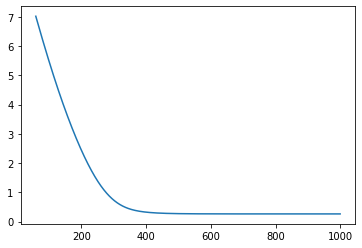

In [124]:


plt.plot(cost[:,47])
min(J[:,0])

In [100]:
J[:,0]

array([0.27333782, 0.26043155, 0.26071188, 0.26102057, 0.26094013,
       0.29302262, 0.26118032, 0.30411366, 0.34586656, 0.26074021,
       0.26068003, 0.31700698, 0.32137061, 0.26037134, 0.29875108,
       0.26072038, 0.26081957, 0.26364797, 0.40165635, 0.26889232,
       0.32808512, 0.38456096, 0.2604037 , 0.27519298, 0.35915507,
       0.28205716, 0.26050894, 0.36256636, 0.26129699, 0.26115949,
       0.40657118, 0.33278675, 0.2606217 , 0.26883964, 0.26550929,
       0.28347779, 0.3248135 , 0.26086587, 0.39897615, 0.26093412,
       0.27379522, 0.26148434, 0.26226936, 0.26372499, 0.39733482,
       0.26060053, 0.26156   , 0.26034527, 0.33016687, 0.26050033])

In [0]:
#Running model over test data

lin_comb_test = np.dot(X_test, beta) + bias
model_test = sigmoid(lin_comb_test)

In [0]:
#Converting probabilities to categories
model_test_label = [1 if i > 0.5 else 0 for i in model_test]        

In [103]:
model_test_label[:10]   #checking output

[0, 1, 1, 1, 1, 0, 1, 0, 1, 1]

In [104]:
#Creating confusion matrix

import sklearn
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(Y_test, model_test_label)
cnf_matrix

array([[121,   7],
       [  6, 166]])

In [72]:
beta    #check coefficients

array([-0.23019303, -0.57670868, -0.7566946 ,  3.79062706, -0.12223979])

In [73]:
bias    #Check self bias

array([1.26776506])

In [74]:
Accuracy = (cnf_matrix[0][0] + cnf_matrix[1][1])/(cnf_matrix[0][0] + cnf_matrix[1][1] + cnf_matrix[0][1] + cnf_matrix[1][0])
Accuracy

0.9566666666666667

Text(0.5, 257.44, 'Predicted label')

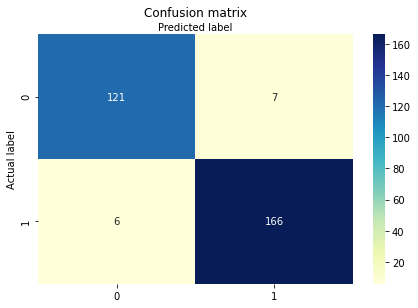

In [75]:
import matplotlib.pyplot as plt
import seaborn as sns

class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [76]:
lin_comb_train = np.dot(X_train, beta) + bias
            
model_train = sigmoid(lin_comb_train)
model_train_label = [1 if i > 0.5 else 0 for i in model_train]

import sklearn
from sklearn import metrics
cnf_matrix2 = metrics.confusion_matrix(Y_train, model_train_label)
cnf_matrix2

array([[268,  19],
       [ 16, 397]])

In [77]:
Accuracy_train = (cnf_matrix2[0][0] + cnf_matrix2[1][1])/(cnf_matrix2[0][0] + cnf_matrix2[1][1] + cnf_matrix2[0][1] + cnf_matrix2[1][0])
Accuracy_train

0.95